<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/deep_autoencoder_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
from keras.models import Model, Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler

In [79]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [83]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [84]:
x_test[0][0][0]

array([158, 112,  49], dtype=uint8)

## Normalização dos dados

In [85]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [86]:
x_train[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [87]:
x_test[0][0][0]

array([0.61960787, 0.4392157 , 0.19215687], dtype=float32)

In [88]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [89]:
entradas = (32 * 32 * 3)
entradas

3072

In [90]:
x_train = x_train.reshape(x_train.shape[0], entradas)
x_test = x_test.reshape(x_test.shape[0], entradas)
x_train.shape, x_test.shape

((50000, 3072), (10000, 3072))

In [91]:
model = Sequential()

### Encoder

In [60]:
model.add(Dense(units = 256, activation = 'relu', input_dim = entradas))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))

### Decoder

In [61]:
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = entradas, activation = 'sigmoid'))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_17 (Dense)             (None, 3072)              396288    
Total params: 810,400
Trainable params: 810,400
Non-trainable params: 0
________________________________________________

In [63]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_ = model.fit(x_train, x_train,
                     epochs = 100, batch_size = 256,
                     validation_data = (x_test, x_test))

In [65]:
np.mean(history_.history['accuracy'])

0.019649799477920168

In [71]:
np.mean(history_.history['val_accuracy'])

0.02010199988297245

In [66]:
dimensao_original = Input(shape = (entradas, ))
camada_encoder0 = model.layers[0]
camada_encoder1 = model.layers[1]
camada_encoder2 = model.layers[2]
camada_encoder3 = model.layers[3]

In [67]:
encoder = Model(dimensao_original,
                camada_encoder3(camada_encoder2(camada_encoder1(camada_encoder0(dimensao_original)))))

encoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
Total params: 403,680
Trainable params: 403,680
Non-trainable params: 0
_________________________________________________________________


In [68]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = model.predict(x_test)
imagens_codificadas.shape, imagens_decodificadas.shape

((10000, 32), (10000, 3072))

In [69]:
numero_imagens = 10
imagens_teste = np.random.randint(x_test.shape[0], size = numero_imagens)
imagens_teste.shape

(10,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

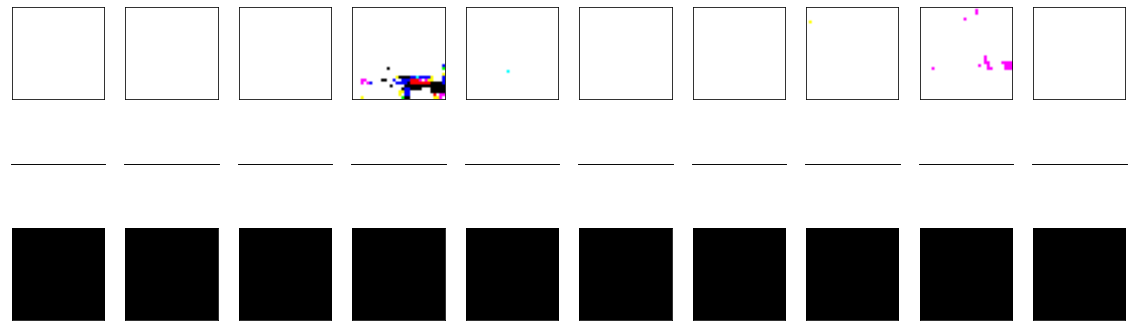

In [70]:
plt.figure(figsize = (20,20))

for i, indice_imagem in enumerate(imagens_teste):
  #Imagem original
  eixo = plt.subplot(10,10, i + 1)
  plt.imshow(x_test[indice_imagem].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  #Imagem codificada
  eixo = plt.subplot(10,10, i + 1 + numero_imagens)
  a = np.expand_dims(imagens_decodificadas[indice_imagem], axis = 0)
  plt.imshow(a)
  plt.xticks(())
  plt.yticks(())

  #Imagem reconstruída
  eixo = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[indice_imagem].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())